In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Градиентный спуск для одной независимой переменной

In [2]:
x = np.arange(30)

In [3]:
y = []

In [4]:
for i in range(len(x)):
    y.append(np.random.uniform(0, 3) * 3 + x[i] + 5) # np.random.uniform() - любое число из дипазона (необязательно целое)

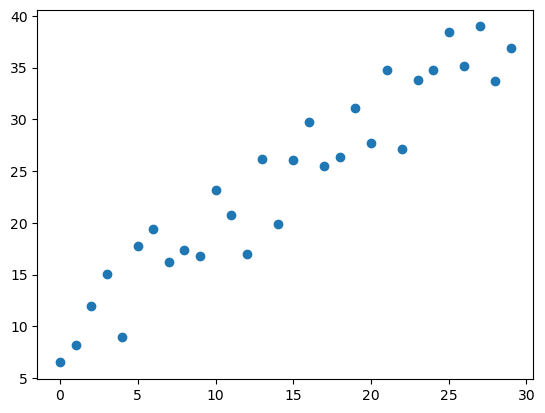

In [5]:
plt.scatter(x, y)

In [6]:
# найдём параметры уравнения регрессии по МНК
slope, intercept = np.polyfit(x, y, 1)

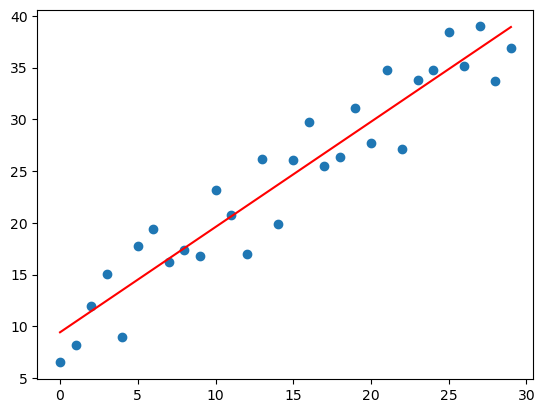

In [7]:
plt.scatter(x, y)
plt.plot(x, intercept + slope * x, 'r')
plt.show()

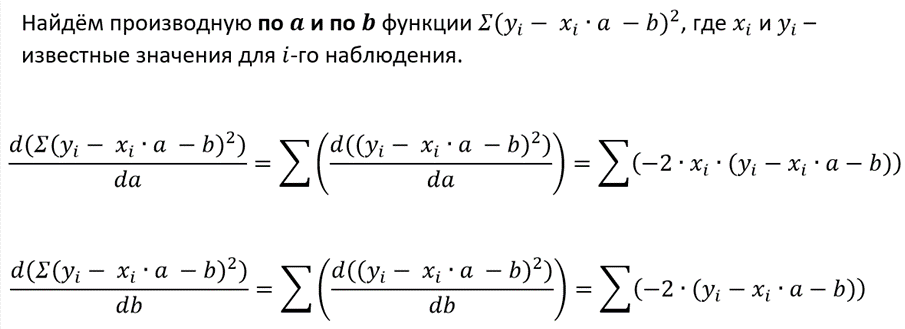

Создадим функцию для этого:

In [8]:
def df_f(a, b):
    df_a = 0
    df_b = 0
    for i in range(len(x)): # для каждого наблюдения:
        df_a += -2 * x[i] * (y[i] - x[i] * a - b) # прибавляем производную по a i-го слагаемого
        df_b += -2 * (y[i] - x[i] * a - b) # прибавляем производную по b i-го слагаемого
    return np.array([df_a, df_b])

In [9]:
# Градиентный спуск
w0 = np.array([0, 0]) # начальное значение (a=0, b=0), откуда начинаем градиентный спуск
la = 0.00001 # шаг

w1 = w0 - la * df_f(w0[0], w0[1]) # следующее значение a и b

while np.sqrt((w1 - w0)[0]**2 + (w1 - w0)[1]**2) > 0.0001:
    w0 = w1
    w1 = w0 - la * df_f(w0[0], w0[1])

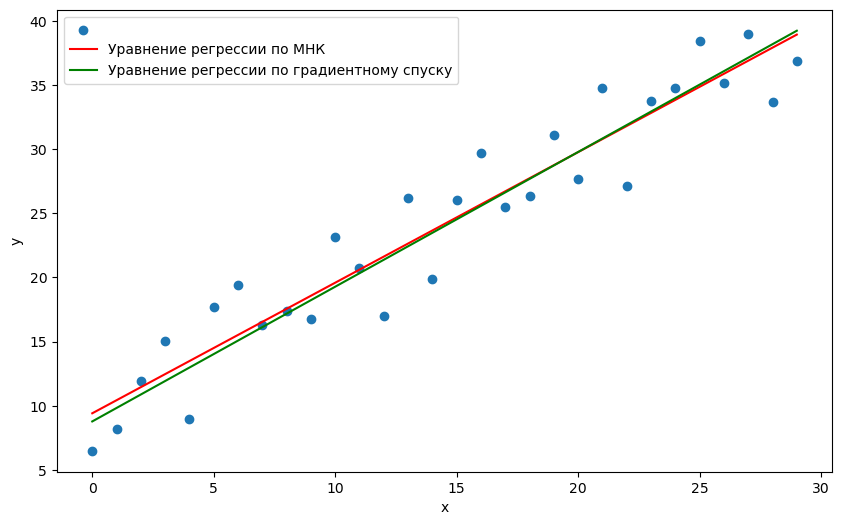

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, intercept + slope * x, 'r') # уравнение регрессии, полученное по МНК
plt.plot(x, w0[1] + w0[0] * x, 'g') # уравнение регрессии, полученное по градиентному спуску
plt.xlabel('x')
plt.ylabel('y')
plt.legend([None, 'Уравнение регрессии по МНК', 'Уравнение регрессии по градиентному спуску'])
plt.show()

# Стохастический градиентный спуск

In [11]:
def df_f(a, b):
    i = np.random.randint(len(x)) # выбираем одно любое наблюдение
    df_a = -2 * x[i] * (y[i] - x[i] * a - b) # находим производную по a для значения x_i и y_i
    df_b = -2 * (y[i] - x[i] * a - b) # находим производную по b для значения x_i и y_i
    return np.array([df_a, df_b])

In [12]:
# Градиентный спуск
w0 = np.array([0, 0]) # начальное значение (a=0, b=0), откуда начинаем градиентный спуск
la = 0.00001 # шаг

w1 = w0 - la * df_f(w0[0], w0[1]) # следующее значение a и b

while np.sqrt((w1 - w0)[0]**2 + (w1 - w0)[1]**2) > 0.0001:
    w0 = w1
    w1 = w0 - la * df_f(w0[0], w0[1])

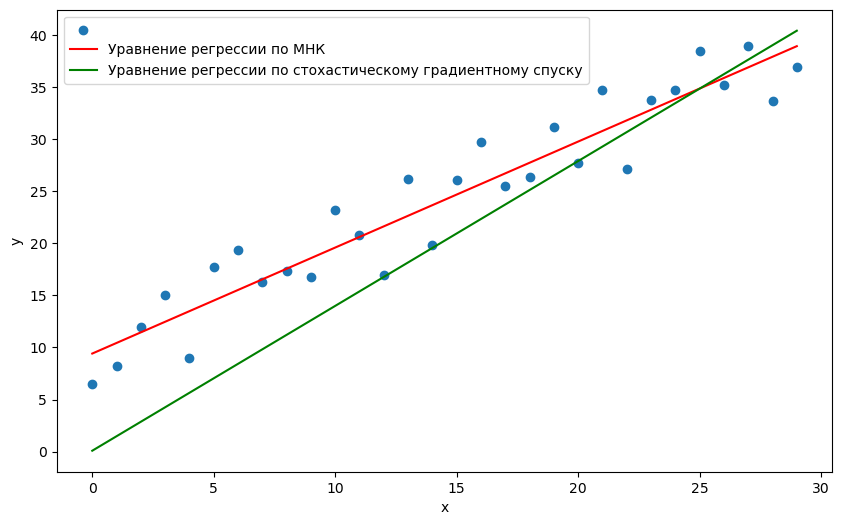

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, intercept + slope * x, 'r') # уравнение регрессии, полученное по МНК
plt.plot(x, w0[1] + w0[0] * x, 'g') # уравнение регрессии, полученное по стохастическому градиентному спуску
plt.xlabel('x')
plt.ylabel('y')
plt.legend([None, 'Уравнение регрессии по МНК', 'Уравнение регрессии по стохастическому градиентному спуску'])
plt.show()